Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
124 54
MSE
[0.2281104644444446, 0.22561189557613182, 0.23015219312169327, 0.22492989496527804, 0.22521746822130861, 0.2255401290740759, 0.22431394337312702, 0.22461946013374623, 0.2248307738330058, 0.22393326596749977, 0.2250649320164623, 0.22748563982928366, 0.22722601179033852, 0.22682433944901903, 0.226786722632607, 0.2260829955555581, 0.22557619085412192, 0.2251456657866573, 0.22361623773017136, 0.2257747494212992, 0.2259692611555583, 0.22513276320403552, 0.22621255652085884, 0.22659414096750133, 0.2258626338794237, 0.22521719063786344, 0.22622014674143745, 0.2264371565212706, 0.22623065906540418, 0.22605856263616808, 0.2263693855479988, 0.22663400547268145, 0.22629657075995105, 0.2260166124705056, 0.22573079286288425, 0.22558

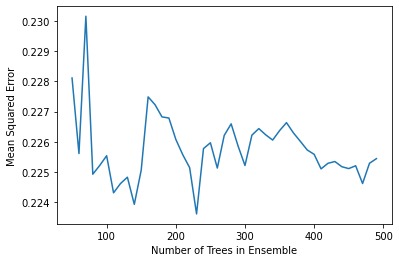

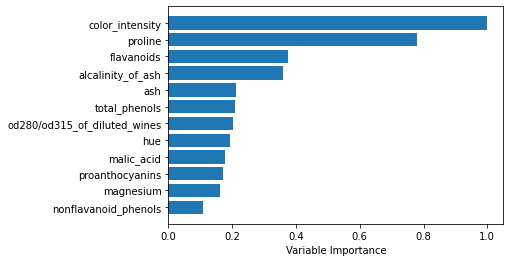

0.2152916250214158


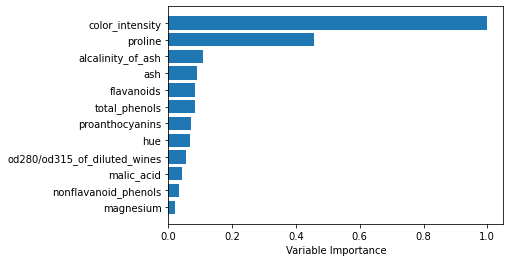

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plot

data = load_wine()   # data load 
data.target[[10, 80, 140]]
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.columns)
df.head()

X = df.iloc[:,1:].to_numpy()
Y = df.iloc[:,0].to_numpy()
wineNames = np.array(data.feature_names[1:])
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 531)
print(len(xTrain), len(xTest))
mseOos = []
nTreeList = range(50, 500, 10)

for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    wineRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))
print("MSE")
print(mseOos)

plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()

regr = RandomForestRegressor(max_depth=4, random_state=531,
                          n_estimators=150)
regr.fit(xTrain, yTrain)
prediction = regr.predict(xTest)
print(mean_squared_error(yTest, prediction))
featureImportance = regr.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()